In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
sb.set()

from aifeel.util import gen_dataframe, read_corpus
from aifeel.util.preprocess import preprocess_text
from aifeel.util.feature_extraction import extract_features, feature_to_vector

# Explore Original Data

In [24]:
neg_df = pd.read_csv('src/aifeel/corpora/negative-reviews.txt', header=None, names=['review'], sep='\t', na_filter=False)
neg_df.head()

,review
0,Image quality not as good as some other brands...
1,nothing
2,"Black text could be better, ink runs out kind ..."
3,The thing won't work
4,"Display grainy, small keypad for text messagin..."


In [25]:
neg_df['tag'] = 0
neg_df.head()

,review,tag
0,Image quality not as good as some other brands...,0
1,nothing,0
2,"Black text could be better, ink runs out kind ...",0
3,The thing won't work,0
4,"Display grainy, small keypad for text messagin...",0


In [26]:
neg_df.shape

(19975, 2)

In [27]:
pos_df = pd.read_csv('src/aifeel/corpora/positive-reviews.txt', header=None, names=['review'], sep='\t', na_filter=False)
pos_df.head()

,review
0,"Size, Size, ans Size."
1,"Excellent quality, speedy printing, low cost"
2,"Cheap, good quality, small size"
3,"Attractive design, satisfying features, the ba..."
4,Pretty much has every feature you could possib...


In [28]:
pos_df['tag'] = 1
pos_df.head()

,review,tag
0,"Size, Size, ans Size.",1
1,"Excellent quality, speedy printing, low cost",1
2,"Cheap, good quality, small size",1
3,"Attractive design, satisfying features, the ba...",1
4,Pretty much has every feature you could possib...,1


In [29]:
pos_df.shape

(20000, 2)

In [30]:
df = pd.concat([pos_df, neg_df], ignore_index=True)
df.tail()

,review,tag
39970,No focus or flash control. No AC adapter.,0
39971,Fold up tray durability questionable,0
39972,Needs linux drivers.,0
39973,nothing,0
39974,"Camera is awful, and menus need serious redesi...",0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  39975 non-null  object
 1   tag     39975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 624.7+ KB


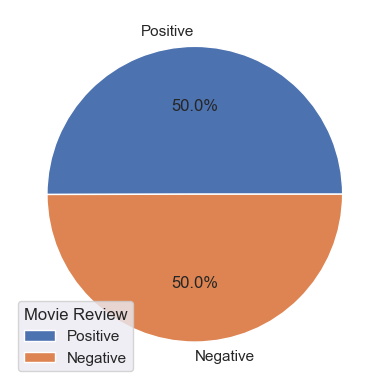

In [32]:
label_counts = df['tag'].value_counts()

label_names = {0: 'Negative', 1: 'Positive'}
label_counts.index = label_counts.index.map(label_names)

plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.legend(title="Movie Review") 
plt.show()

In [33]:
df['review_lower'] = df['review'].str.lower()
df['review_lower']

0                                    size, size, ans size.
1             excellent quality, speedy printing, low cost
2                          cheap, good quality, small size
3        attractive design, satisfying features, the ba...
4        pretty much has every feature you could possib...
                               ...                        
39970           no focus or flash control.  no ac adapter.
39971                 fold up tray durability questionable
39972                                 needs linux drivers.
39973                                              nothing
39974    camera is awful, and menus need serious redesi...
Name: review_lower, Length: 39975, dtype: object

In [34]:
count_none = df['review_lower'].str.count('none').sum()
count_no = df['review_lower'].str.count('no').sum()
count_not = df['review_lower'].str.count('not').sum()
count_exclamation = df['review_lower'].str.count('!').sum()
print(f"Count none", {count_none})
print(f"Count no", {count_no})
print(f"Count not", {count_not})
print(f"Count_exclamation", {count_exclamation})

Count none {1333}
Count no {9283}
Count not {3020}
Count_exclamation {2998}


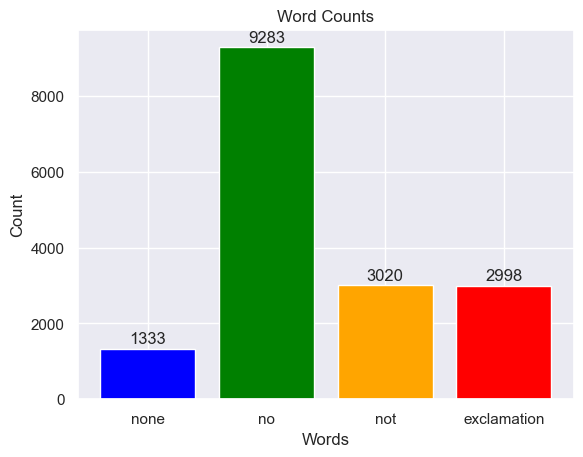

In [35]:
counts = {
    'none': count_none,
    'no': count_no,
    'not': count_not,
    'exclamation': count_exclamation
}

fig, ax = plt.subplots()
bars = plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval), ha='center', va='bottom')

plt.xlabel('Words')
plt.ylabel('Count')
plt.title('Word Counts')
plt.show()
